Handeling the Missing Values For Water Portability Data.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Functions - Descriptions

.isnull()

This function returns a pandas dataframe, where each value is a boolean value True if the value is missing, False otherwise.

.notnull()

Similarly to the previous function, the values for this one are False if either NaN or None value is detected.

.info()

This function generates three main columns, including the “Non-Null Count” which shows the number of non-missing values for each column.

.isna()

This one is similar to isnull and notnull. However it shows True only when the missing value is NaN type. 

In [26]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [24]:
mValue=df.mean()
df.fillna(mValue,inplace=True)

In [25]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [32]:
from sklearn.impute import SimpleImputer
#Specify the strategy to be the median class
fea_transformer = SimpleImputer(strategy="median")
values = fea_transformer.fit_transform(df[['ph','Sulfate','Trihalomethanes']])
pd.DataFrame(values)

,0,1,2
0,7.080795,368.516441,86.990970
1,3.716080,333.775777,56.329076
2,8.099124,333.775777,66.420093
3,8.316766,356.886136,100.341674
4,9.092223,310.135738,31.997993
...,...,...,...
3271,4.668102,359.948574,66.687695
3272,7.808856,333.775777,66.396293
3273,9.419510,333.775777,69.845400
3274,5.126763,333.775777,77.488213


{'whiskers': [<matplotlib.lines.Line2D at 0x210ab9498d0>,
 'caps': [<matplotlib.lines.Line2D at 0x210ab94b450>,
 'boxes': [<matplotlib.lines.Line2D at 0x210ab8e8bd0>,
 'medians': [<matplotlib.lines.Line2D at 0x210ab954b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x210ab955690>,
 'means': []}

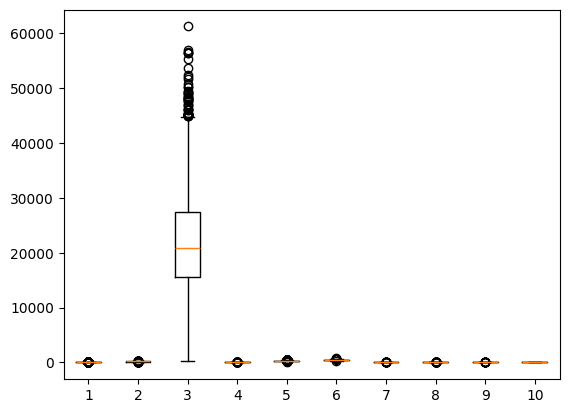

In [35]:
plt.boxplot(df)

In [38]:
cov_matrix = np.cov(data_points, rowvar=False)

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[3.5 4.4]
 [4.4 6.8]]
